In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import ta

In [146]:
originalEth = pd.read_csv('./ETH-USD.csv')
originalBtc = pd.read_csv('./BTC-USD.csv')

print('eth shape:', originalEth.shape)
print('btc shape:', originalBtc.shape)

eth shape: (2315, 7)
btc shape: (2710, 7)


In [147]:
# filter to 2020
eth = originalEth[originalEth.Date.str.match('2020.*')]
eth.name = 'ETH'
btc = originalBtc[originalBtc.Date.str.match('2020.*')]
btc.name = 'BTC'

# numbers of rows, columns
print('eth shape 2020:', eth.shape)
print('btc shape 2020:', btc.shape)

eth shape 2020: (366, 7)
btc shape 2020: (366, 7)


In [149]:
eth
# print(btc)

,Date,Open,High,Low,Close,Adj Close,Volume
1608,2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7.935230e+09
1609,2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8.032709e+09
1610,2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,1.047685e+10
1611,2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7.430905e+09
1612,2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7.526675e+09
...,...,...,...,...,...,...,...
1969,2020-12-27,635.887146,711.393555,628.334961,682.642334,682.642334,2.609355e+10
1970,2020-12-28,683.205811,745.877747,683.205811,730.397339,730.397339,2.422257e+10
1971,2020-12-29,730.358704,737.952881,692.149414,731.520142,731.520142,1.871068e+10
1972,2020-12-30,731.472839,754.303223,720.988892,751.618958,751.618958,1.729457e+10


In [101]:
# 4 main categories of analysis:
# volume based
# volatility based
# trend based
# momentum based

In [150]:
btc

,Date,Open,High,Low,Close,Adj Close,Volume
1932,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...,...
2293,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
2294,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893
2295,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774
2296,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704


In [105]:
%%capture
featuresETH = ta.add_all_ta_features(eth, "Open", "High", "Low", "Close", "Volume", fillna=True)
featuresBTC = ta.add_all_ta_features(btc, "Open", "High", "Low", "Close", "Volume", fillna=True)

In [106]:
# featuresETH
featuresBTC

,Date,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
1932,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,-6.764844e+09,18565664997,-0.364374,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7200.174316,-35.229134,0.000000,0.000000
1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,-2.002396e+10,-2236418468,-0.508639,...,-0.238401,-0.047680,-0.190721,0.952435,0.190487,0.761948,7144.522590,-2.981929,-3.027293,-2.981929
1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,3.278762e+08,25875062564,0.004859,...,-0.023344,-0.042813,0.019469,4.628974,1.078184,3.550790,7195.744434,5.145166,5.017175,2.009812
1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,1.353672e+10,44319333839,0.157544,...,0.217536,0.009257,0.208279,3.526827,1.567913,1.958914,7255.540709,0.895487,0.891501,2.923296
1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,-3.233808e+09,64044407934,-0.030609,...,0.403645,0.088134,0.315510,3.132972,1.880925,1.252047,7307.044519,0.008915,0.008914,2.932472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605,2.047746e+12,1453829721050,0.307291,...,8.768312,7.457946,1.310366,11.285755,6.405187,4.880568,24193.339700,-0.623149,-0.625099,264.884151
2294,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893,2.071532e+12,1502886463943,0.365603,...,9.184618,7.803280,1.381338,10.843421,7.292834,3.550587,24614.574974,3.092663,3.045804,276.168790
2295,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774,2.116256e+12,1548152410717,0.382213,...,9.463787,8.135382,1.328405,9.718010,7.777869,1.940141,24977.241892,1.025036,1.019818,280.024654
2296,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704,2.161250e+12,1599439853421,0.422988,...,10.013238,8.510953,1.502285,9.754096,8.173115,1.580982,25802.015244,5.403450,5.262518,300.559096


In [109]:
# bollinger bands - volatility
def bollinger_bands(df):
    # bollinger bands are a TA tool defined by using three trendlines: an upper band, a lower band, and a moving average band
    # bollinger bands fall under the volatility class of TA methods
    # the closer the prices move to the upper band, the more overbought the market, and the closer the prices move to the lower band, the more oversold the market
    # as seen across the yearly data
    # When the bands come close together, constricting the moving average, it is called a squeeze. A squeeze signals a period of low volatility and is considered by
    # traders to be a potential sign of future increased volatility and possible trading opportunities. Conversely, the wider apart the bands move, the more likely the 
    # chance of a decrease in volatility and the greater the possibility of exiting a trade. However, these conditions are not trading signals. The bands give no indication 
    # when the change may take place or in which direction the price could move. 
    plt.plot(df.volatility_bbh, label='Upper Band')
    plt.plot(df.volatility_bbl, label='Lower Band')
    plt.plot(df.volatility_bbm, label='Moving Average Band')
    plt.title('Bollinger Bands ' + df.name)
    plt.legend()
    plt.show()

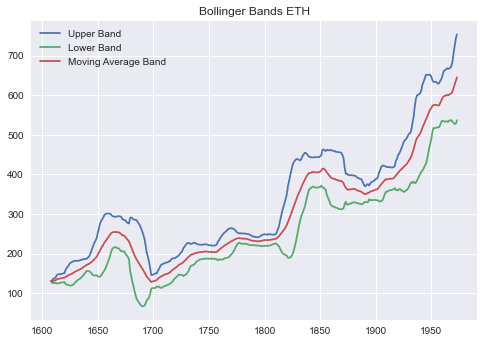

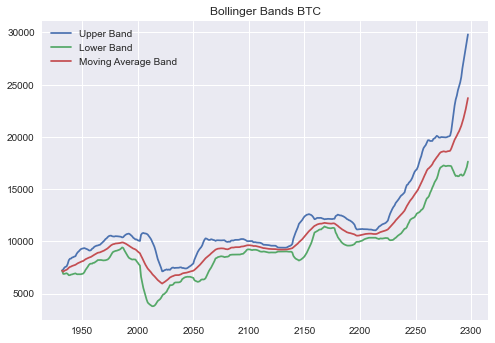

In [110]:
bollinger_bands(featuresETH)
bollinger_bands(featuresBTC)

In [134]:
# keltner channels - volatility
def keltner(df):
    # Keltner Channels are volatility-based bands that are placed on either side of an asset's price and can aid in determining the direction of a trend.
    # have many uses: trend direction, uptrend capturing, price weakness
    # Price reaching the upper Keltner Channel band is bullish, while reaching the lower band is bearish.
    # The angle of the Keltner Channel also aids in identifying the trend direction. The price may also oscillate between the upper and lower 
    # Keltner Channel bands, which can be interpreted as resistance and support levels.
    plt.plot(df.Close, label='Close')
    plt.plot(df.volatility_kcc, label='Central KC')
    plt.plot(df.volatility_kch, label='High KC')
    plt.plot(df.volatility_kcl, label='Low KC')
    plt.title('Keltner Channel ' + df.name)
    plt.legend()
    plt.show()

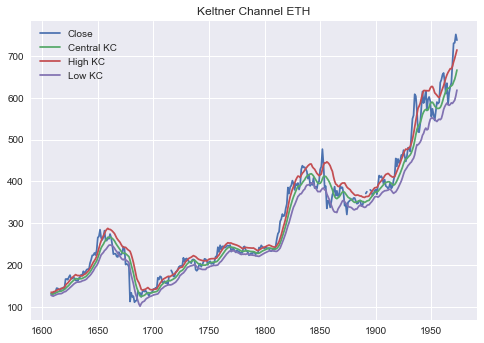

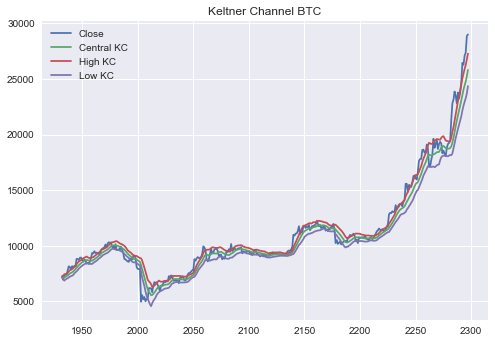

In [135]:
keltner(featuresETH)
keltner(featuresBTC)

In [205]:
# donchian channels - volatility
def donchian(df):
    # come back here
    # Donchian Channels are a technical indicator seeks to identify bullish and bearish extremes that favor 
    # reversals as well as higher and lower breakouts, breakdowns, and emerging trends.
    # The middle band simply computes the average between the highest high over N periods and the lowest low over N periods.
    # These points identify the median or mean reversion price
    # Three values build a visual map of price over time, similarly to Bollinger Bands, indicating the extent of bullishness 
    # and bearishness for the chosen period. The top line identifies the extent of bullish energy, highlighting the highest 
    # price achieved for the period through the bull-bear conflict. 
    # The center line identifies the median or mean reversion price for the period, highlighting the middle ground achieved for the 
    # period through the bull-bear conflict. The bottom line identifies the extent of bearish energy, highlighting the lowest price 
    # achieved for the period through the bull-bear conflict. 
    # plt.plot(df.volatility_dcp, label='DCP')
    # plt.title('DCP')
    # plt.legend()
    # plt.show()
    # plt.plot(df.volatility_dcw, label='DCW')
    # plt.title('DCW')
    # plt.legend()
    # plt.show()
    plt.plot(df.Close, label='Close')
    plt.plot(df.volatility_dch, label='High DC')
    plt.plot(df.volatility_dcl, label='Low DC')
    plt.title('Donchian Channel ' + df.name)
    plt.legend()
    plt.show()

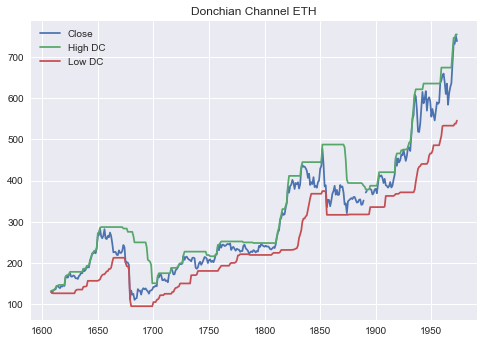

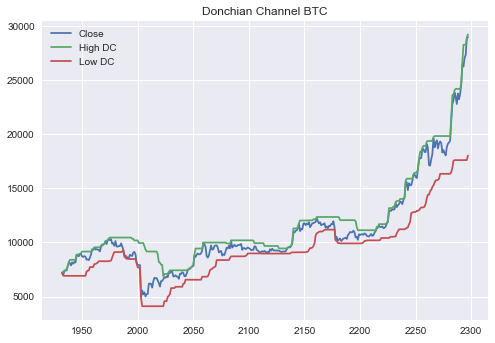

In [206]:
donchian(featuresETH)
donchian(featuresBTC)

In [141]:
# ulcer index - volatility
def ulcer(df):
    # The Ulcer Index (UI) is a technical indicator that measures downside risk in terms of both the depth and duration of price declines.
    #  The greater the value of the Ulcer Index, the longer it takes for a stock to get back to the former high. Simply stated, it is designed as 
    # one measure of volatility only on the downside. 
    # Watching for spikes in the Ulcer Index that are beyond "normal" can also be used to indicate times of excessive downside risk, which investors 
    # may wish to avoid by exiting long positions. 
    plt.plot(df.Close, label='Close')
    plt.title(df.name)
    plt.legend()
    plt.show()
    plt.plot(df.volatility_ui, label='UI')
    plt.title('Ulcer Index ' + df.name)
    plt.legend()
    plt.show()

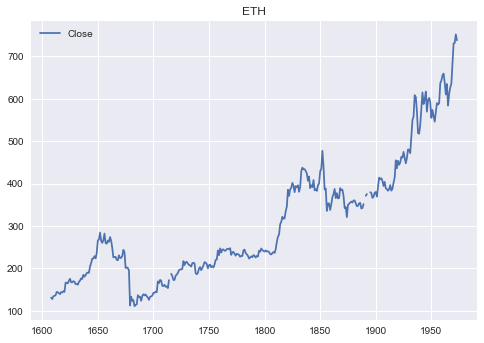

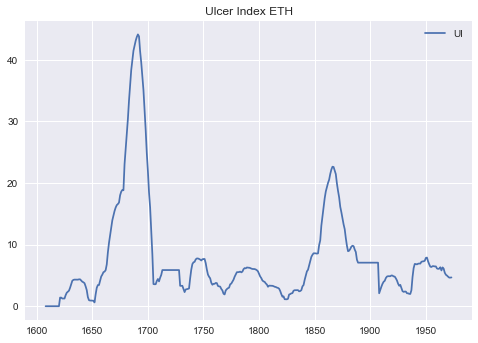

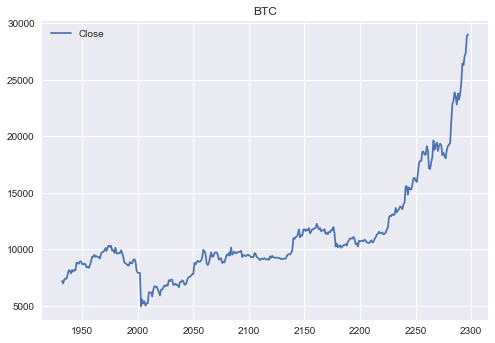

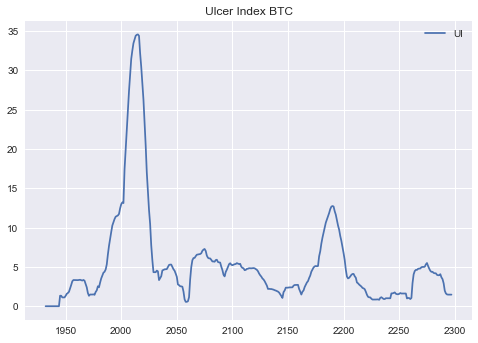

In [151]:
ulcer(featuresETH)
ulcer(featuresBTC)

In [155]:
# money flow index - volume
def money_flow_index(df):
    # MFI uses price and volume data for identifying overbought or oversold signals in an asset
    # An MFI reading above 80 is considered overbought and an MFI reading below 20 is considered oversold, although levels of 90 and 10 are also used as thresholds.
    # A divergence between the indicator and price is noteworthy. For example, if the indicator is rising while the price is falling or flat, the price could start rising.
    # question
    plt.plot(df.Close, label='Close')
    plt.title(df.name)
    plt.legend()
    plt.show()
    plt.plot(df.volume_mfi, label='MFI')
    plt.title('Money Flow Index ' + df.name)
    plt.legend()
    plt.show()

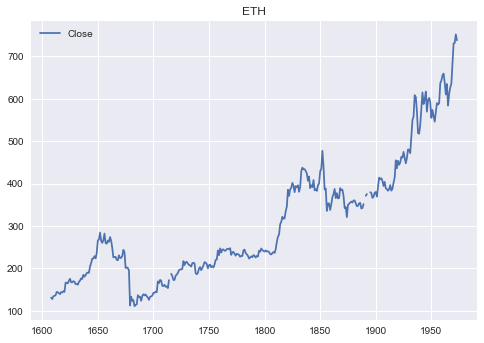

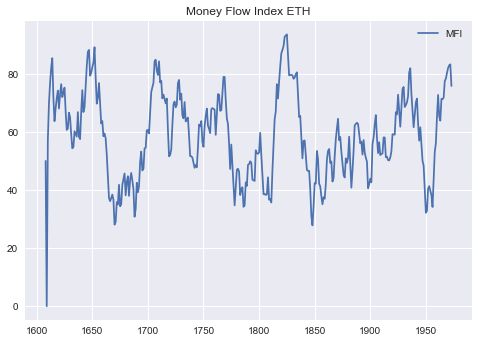

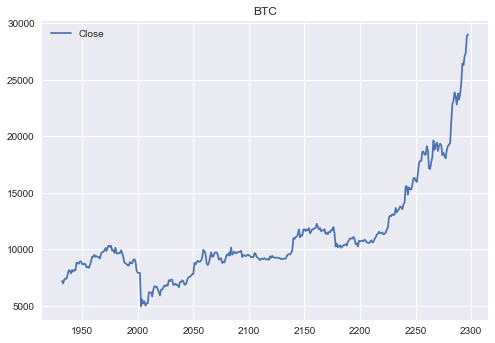

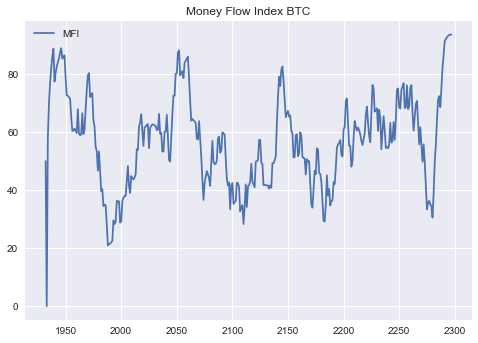

In [156]:
money_flow_index(featuresETH)
money_flow_index(featuresBTC)

In [161]:
# accumulation/distribution index - volume
def accumulation_distribution_index(df):
    # The accumulation/distribution indicator (A/D) is a cumulative indicator that uses volume and price to assess whether a stock is being accumulated 
    # or distributed. The A/D measure seeks to identify divergences between the stock price and the volume flow. 
    # If the price is rising but the indicator is falling, then it suggests that buying or accumulation volume may not be enough to support the price 
    # rise and a price decline could be forthcoming. 
    # In general, a rising A/D line helps confirm a rising price trend, while a falling A/D line helps confirm a price downtrend.
    # question
    plt.plot(df.Close, label='Close')
    plt.title(df.name)
    plt.legend()
    plt.show()
    plt.plot(df.volume_adi, label='ADI')
    plt.title('Accumulation/Distribution Index ' + df.name)
    plt.legend()
    plt.show()


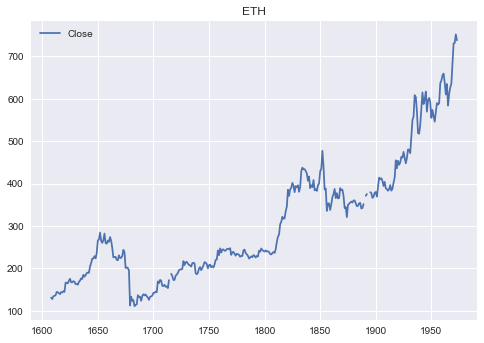

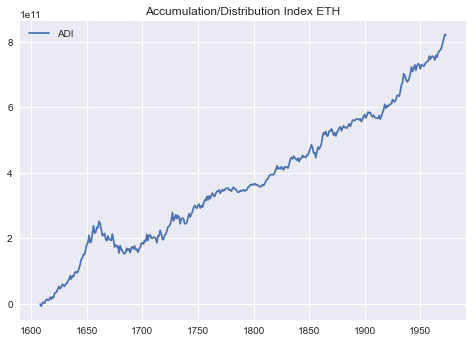

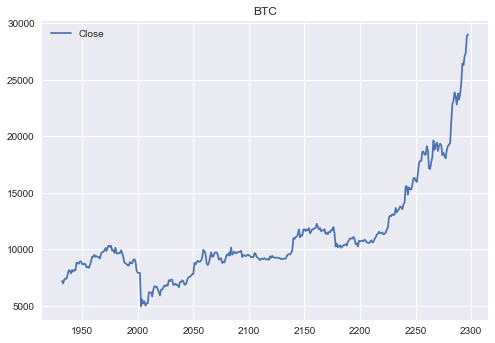

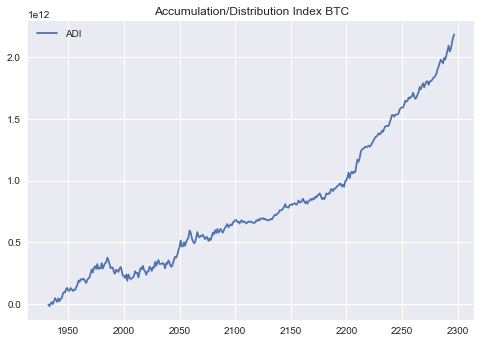

In [162]:
accumulation_distribution_index(featuresETH)
accumulation_distribution_index(featuresBTC)

In [168]:
# on balance volume - volume
def on_balance_volume(df):
    # On-balance volume (OBV) is a technical trading momentum indicator that uses volume flow to predict changes in stock price
    # Joseph Granville first developed the OBV metric, he believed that when volume increases sharply without a significant change
    # in the stock's price, the price will eventually jump upward or fall downward. 
    # it is calculated by summing the volume on an up-day and subtracting the volume on a down-day
    plt.plot(df.Close, label='Close')
    plt.title(df.name)
    plt.legend()
    plt.show()
    plt.plot(df.volume_obv, label='OBV')
    plt.title('On Balance Volume ' + df.name)
    plt.legend()
    plt.show()

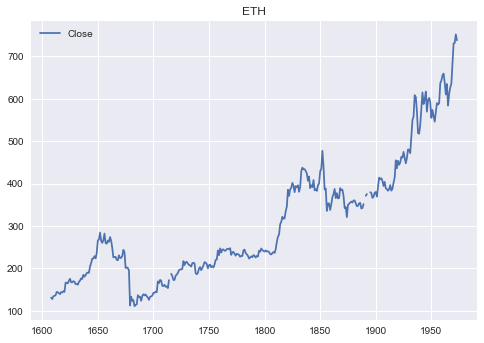

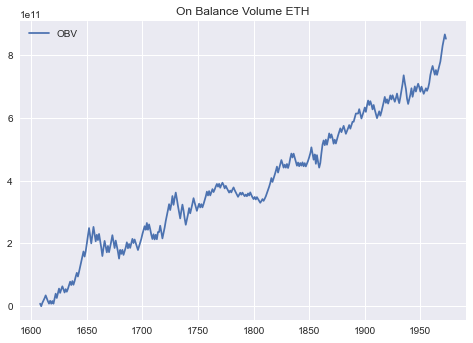

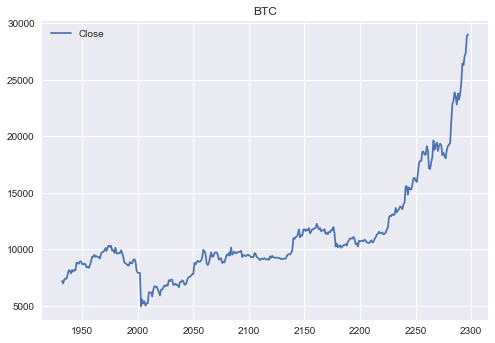

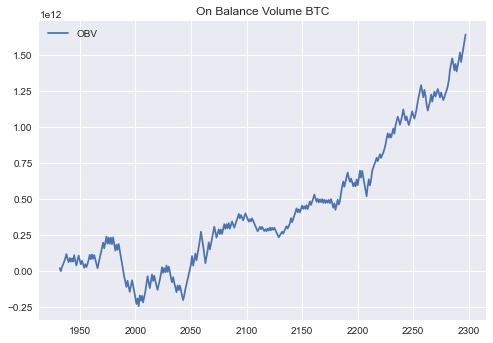

In [169]:
on_balance_volume(featuresETH)
on_balance_volume(featuresBTC)

In [170]:
# Chaikin Money Flow - volume
def chaikin_money_flow(df):
    # When the Chaikin money flow indicator is red, it suggests the market is in a downtrend and when it is green, the indicator suggests an uptrend.
    # The principle behind the Chaikin Money Flow is the nearer the closing price is to the high, the more accumulation has taken place. Conversely, 
    # the nearer the closing price is to the low, the more distribution has taken place.
    # A CMF value above the zero line is a sign of strength in the market, and a value below the zero line is a sign of weakness in the market.
    # question
    plt.plot(df.Close, label='Close')
    plt.title(df.name)
    plt.legend()
    plt.show()
    plt.plot(df.volume_cmf, label='CMF')
    plt.title('Chaikin Money Flow ' + df.name)
    plt.legend()
    plt.show()

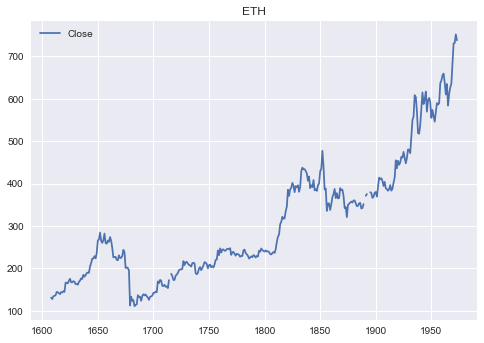

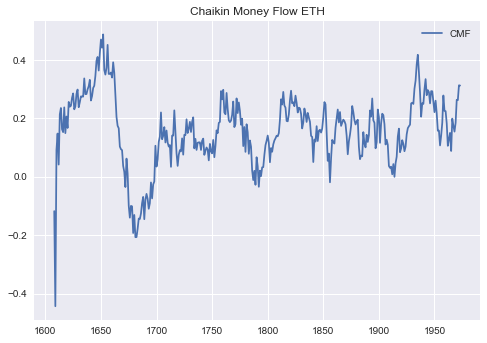

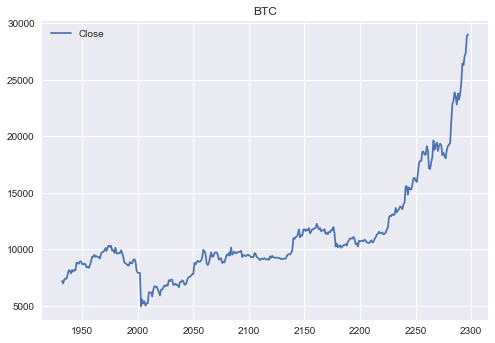

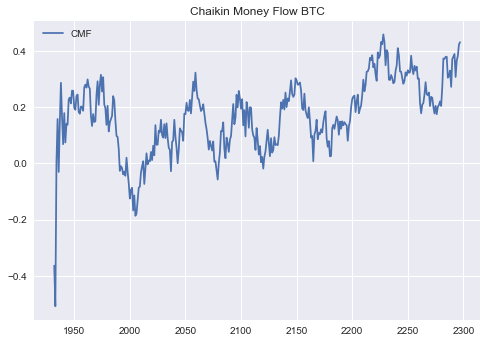

In [171]:
chaikin_money_flow(featuresETH)
chaikin_money_flow(featuresBTC)

In [172]:
# force index - volume
def force_index(df):
    # The force index is a technical indicator that measures the amount of power used to move the price of an asset.
    # A rising force index, above zero, helps confirm rising prices.
    # A falling force index, below zero, helps confirm falling prices.
    # A breakout, or a spike, in the force index, helps confirm a breakout in price.
    # If the force index is making lower swing highs while the price is making higher swing highs, this is bearish divergence and warns the price may soon decline.
    # If the force index is making higher swing lows while the price is making lower swing lows, this is bullish divergence and warns the price may soon head higher.
    # question
    plt.plot(df.Close, label='Close')
    plt.title(df.name)
    plt.legend()
    plt.show()
    plt.plot(df.volume_fi, label='FI')
    plt.title('Force Index ' + df.name)
    plt.legend()
    plt.show()


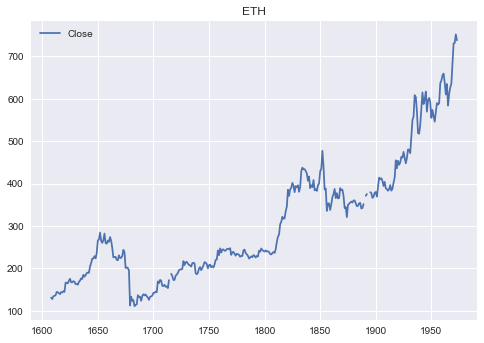

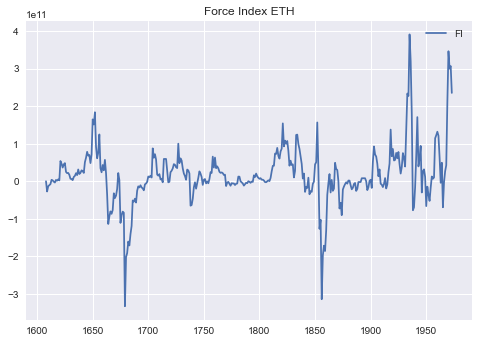

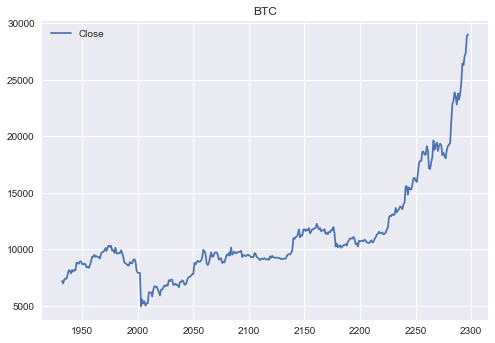

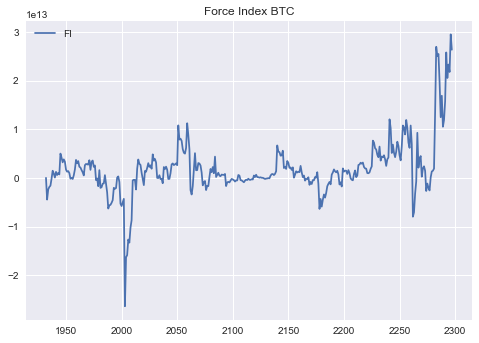

In [174]:
force_index(featuresETH)
force_index(featuresBTC)

In [181]:
# ease of movement- volume
def ease_of_movement(df):
    # The Ease of Movement indicator shows the relationship between price and volume, and it's often used to assess the strength of an underlying trend.
    # Ease of Movement calculates how easily a price can move up or down.
    # The calculation subtracts yesterday's average price from today's average price and divides the difference by volume.
    plt.plot(df.Close, label='Close')
    plt.title(df.name)
    plt.legend()
    plt.show()
    plt.plot(df.volume_em, label='EM')
    plt.plot(df.volume_sma_em, label='Simple Moving Average')
    plt.title('Ease of Movement ' + df.name)
    plt.legend()
    plt.show()

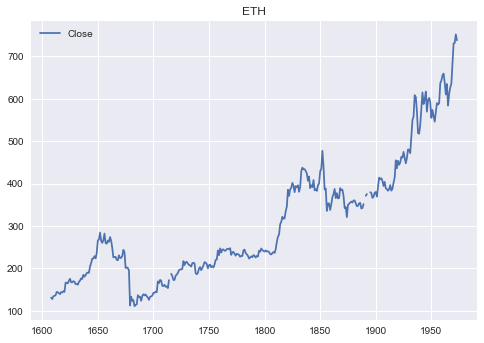

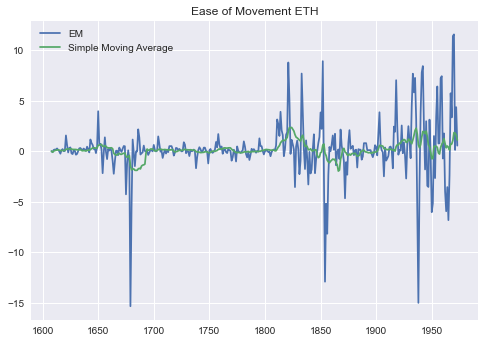

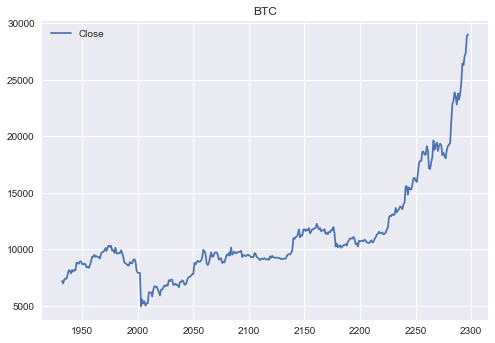

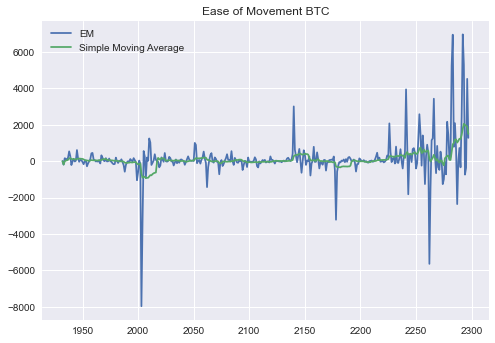

In [183]:
ease_of_movement(featuresETH)
ease_of_movement(featuresBTC)

In [184]:
# volume price trend - volume
def volume_price_trend(df):
    # question AND IMPORTANT CAN BE COMBINED WITH ADX
    # The volume price trend (VPT) indicator helps determine a security’s price direction and strength of price change.
    # a trader may buy a stock when the VPT line crosses above its signal line and sell when the VPT line passes below its signal line.
    plt.plot(df.Close, label='Close')
    plt.title(df.name)
    plt.legend()
    plt.show()
    plt.plot(df.volume_vpt, label='VPT')
    plt.title('Volume Price Trend ' + df.name)
    plt.legend()
    plt.show()

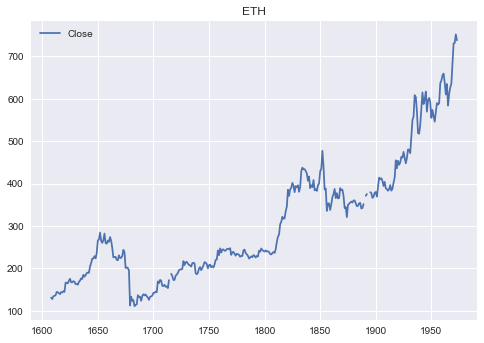

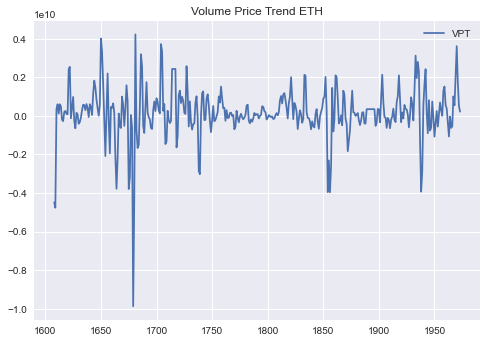

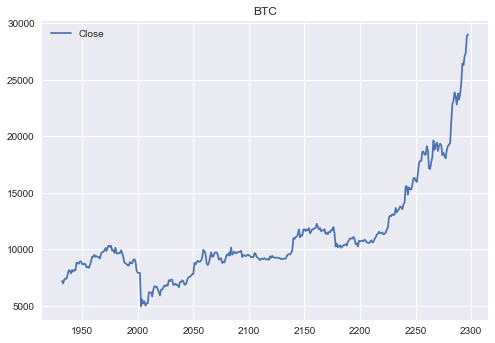

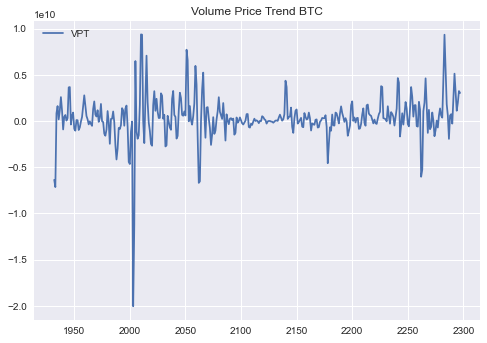

In [186]:
volume_price_trend(featuresETH)
volume_price_trend(featuresBTC)

In [187]:
# negative volume index - volume
def negative_volume_index(df):
    # The negative volume index (NVI) is a technical indication line that integrates volume and price to graphically show how price movements are affected by down volume days. 
    # If NVI is higher, it means that the price is increasing with decreased volume. If NVI is lower it means that the price is decreasing as fewer investors trade the security. 
    plt.plot(df.Close, label='Close')
    plt.title(df.name)
    plt.legend()
    plt.show()
    plt.plot(df.volume_nvi, label='NVI')
    plt.title('Negative Volume Index ' + df.name)
    plt.legend()
    plt.show()

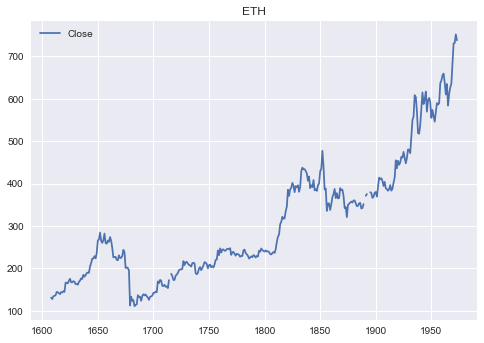

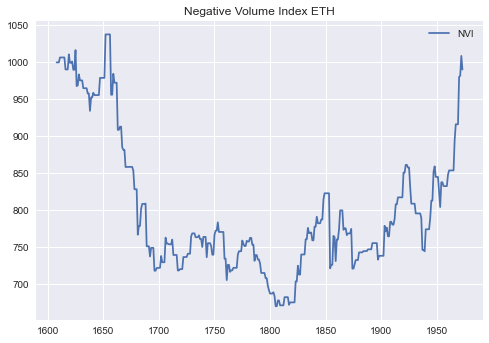

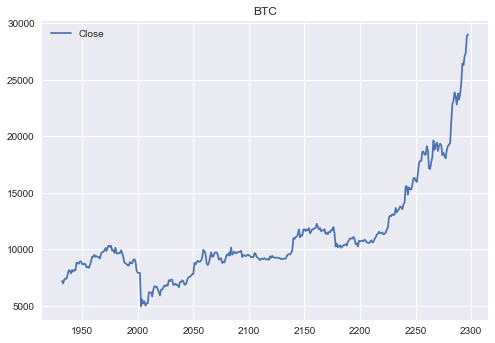

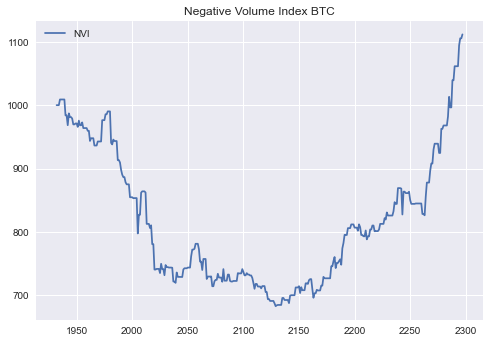

In [188]:
negative_volume_index(featuresETH)
negative_volume_index(featuresBTC)

In [192]:
# Volume Weighted Average Price - volume
def volume_weighted_average_price(df):
    # VWAP is important because it provides traders with insight into both the trend and value of a security. 
    # Retail and professional traders may use the VWAP as part of their trading rules for determining intraday trends.
    plt.plot(df.volume_vwap, label='VWAP')
    plt.plot(df.Close, label='Close')
    plt.title('Volume Weighted Average Price ' + df.name)
    plt.legend()
    plt.show()

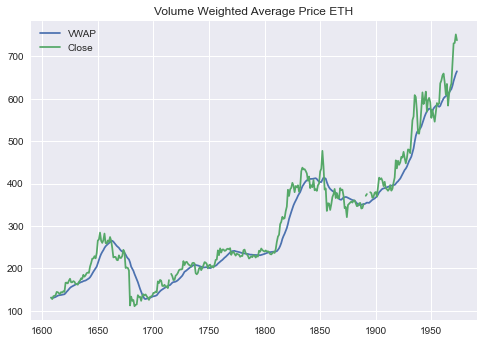

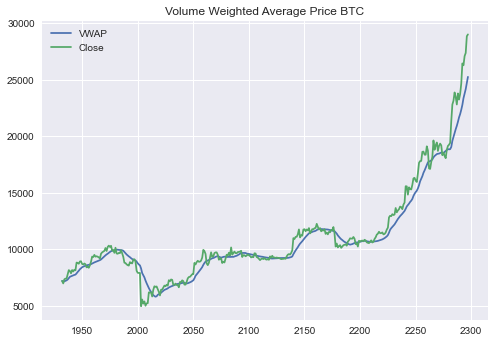

In [194]:
volume_weighted_average_price(featuresETH)
volume_weighted_average_price(featuresBTC)

In [201]:
# RSI - volume
def rsi(df):
    # As a general rule, RSI is a better performer in a trending market whereas Stochastic performs well during flat or choppy markets
    # Because of the 2020 history, I will ignore Stochastic RSI and instead focus of RSI
    # RSI stands for relative strength index, it is used in technical analysis that measures the magnitude of recent price changes to 
    # evaluate overbought or oversold conditions in the price.
    # Traditional interpretation and usage of the RSI are that values of 70 or above indicate that a security is becoming overbought 
    # or overvalued and may be primed for a trend reversal or corrective pullback in price. An RSI reading of 30 or below indicates 
    # an oversold or undervalued condition. 
    # plt.plot(df.Close, label='Close')
    plt.plot(df.Close, label='Close')
    plt.title(df.name)
    plt.legend()
    plt.show()
    plt.plot(df.momentum_rsi, label='RSI')
    plt.title('RSI ' + df.name)
    plt.legend()
    plt.show()

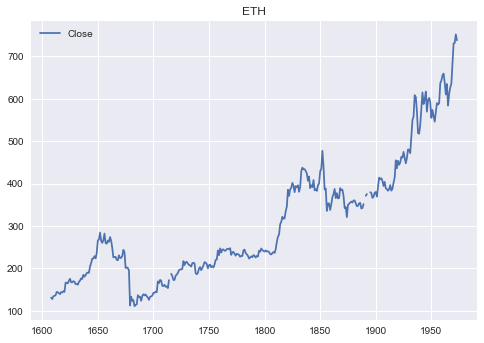

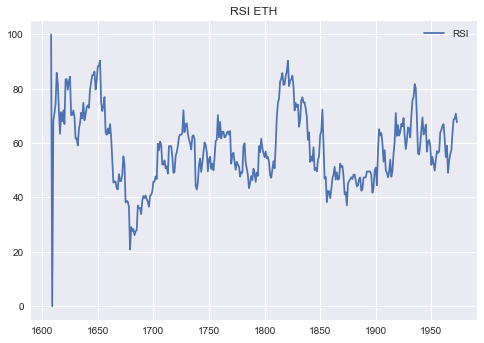

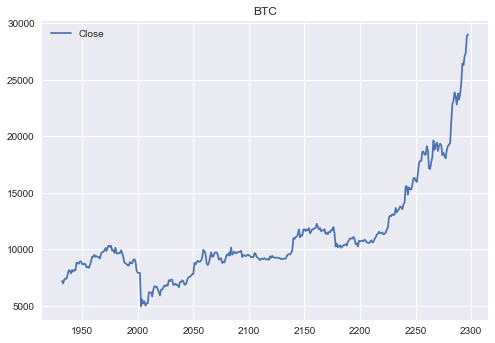

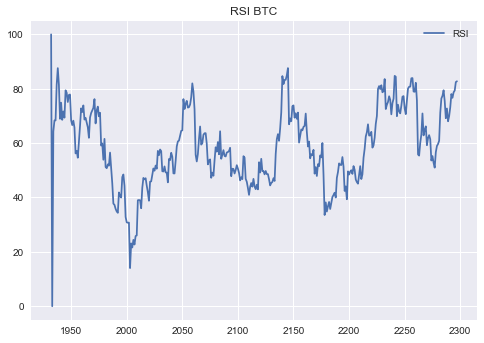

In [202]:
rsi(featuresETH)
rsi(featuresBTC)